# EXPT 1 - Simple Linear Regression Model for Predicting the Marks Scored

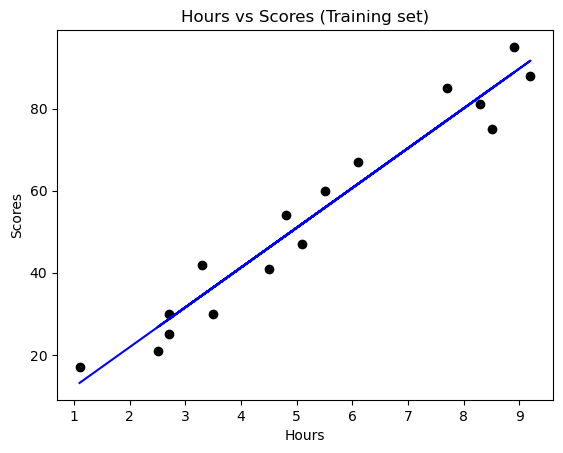

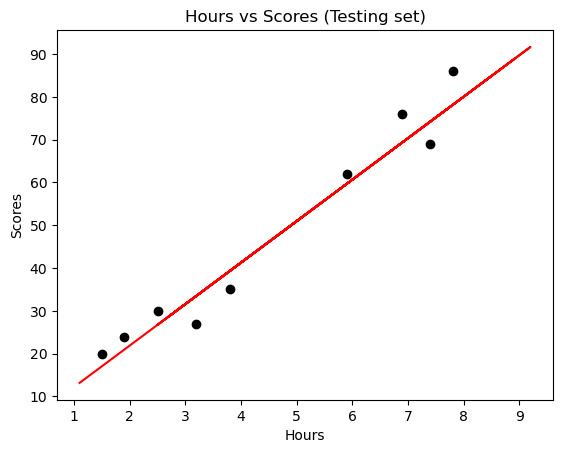

Mean Squared Error: 25.463280738222547
Mean Absolute Error: 4.691397441397438
Root Mean Squared Error: 5.046115410711743


In [29]:
# Program to implement Simple Linear Regression for predicting student scores
# Developed by: Mohamed Riyaz Ahamed
# Register Number: 212224240092

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Load the dataset
df = pd.read_csv("E:/Downloads/student_scores.csv")
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# Step 2: Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# Step 3: Train the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Step 4: Predict
y_pred = regressor.predict(x_test)

# Step 5: Plot Training set
plt.scatter(x_train, y_train, color='black')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title("Hours vs Scores (Training set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# Step 6: Plot Testing set
plt.scatter(x_test, y_test, color='black')
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.title("Hours vs Scores (Testing set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# Step 7: Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


# EXPT 2 - Multivariate Linear Regression Model Using SGD

In [30]:


import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import SGDRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['HousingPrice'] = dataset.target
print(df.head())

X = df.drop(columns=['AveOccup', 'HousingPrice'])  # Independent variables
X.info()

Y = df[['AveOccup', 'HousingPrice']]  # Dependent variables (Multi-output)
Y.info()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

Y_train = scaler_Y.fit_transform(Y_train)
Y_test = scaler_Y.transform(Y_test)

sgd = SGDRegressor(max_iter=1000, tol=1e-3)
multi_output_sgd = MultiOutputRegressor(sgd)
multi_output_sgd.fit(X_train, Y_train)
Y_pred = multi_output_sgd.predict(X_test)

Y_pred = scaler_Y.inverse_transform(Y_pred)
Y_test = scaler_Y.inverse_transform(Y_test)

mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("\nPredictions:\n", Y_pred[:5])


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  HousingPrice  
0    -122.23         4.526  
1    -122.22         3.585  
2    -122.24         3.521  
3    -122.25         3.413  
4    -122.25         3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population

# EXPT 3 - Logistic Regression Model to Predict the Placement Status of Student


In [31]:
# Program to implement the Logistic Regression Model to Predict the Placement Status of Student.
# Developed by: Mohamed Riyaz Ahamed
# RegisterNumber: 212224240092

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
data = pd.read_csv(r"C:\Users\admin\AProjects\BLEH\Placement_Data.csv")

# Drop unwanted columns
data = data.drop(["sl_no", "salary"], axis=1)

# Label encode categorical columns using loop
le = LabelEncoder()
label_columns = [
    "gender", "ssc_b", "hsc_b", "hsc_s", 
    "degree_t", "workex", "specialisation", "status"
]
for col in label_columns:
    data[col] = le.fit_transform(data[col])

# Define X and y
x = data.drop("status", axis=1)
y = data["status"]

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Train logistic regression
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train, y_train)

# Predict and evaluate
y_pred = lr.predict(x_test)
print("Accuracy:", lr.score(x_test, y_test))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Custom input prediction
sample = lr.predict([[1, 80, 1, 0, 1, 1, 90, 1, 0, 85, 1, 85]])
print("Sample Prediction:", sample)


Accuracy: 0.813953488372093
Confusion Matrix:
 [[11  5]
 [ 3 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.83      0.89      0.86        27

    accuracy                           0.81        43
   macro avg       0.81      0.79      0.80        43
weighted avg       0.81      0.81      0.81        43

Sample Prediction: [0]


C:\Users\admin\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# EXPT 4 - Logistic Regression Using SGD Classifier

Accuracy: 0.6
Confusion Matrix:
 [[10  0  0]
 [ 1  8  0]
 [ 0 11  0]]


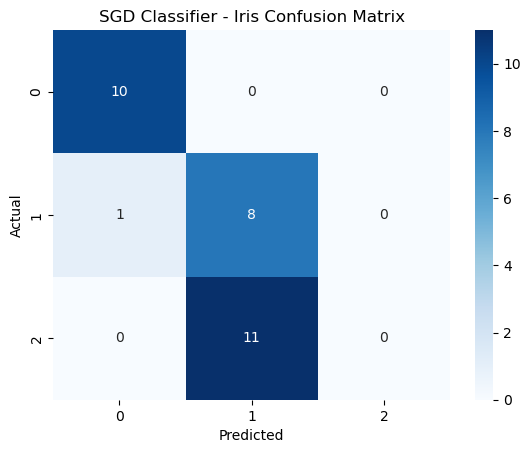

In [32]:
# Program to implement the prediction of iris species using SGD Classifier.
# Developed by: Mohamed Riyaz Ahamed
# Register Number: 212224240092

from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
iris = load_iris()

# Create pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Define features and target
x = df.drop('target', axis=1)
y = df['target']

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the SGD Classifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_clf.fit(x_train, y_train)

# Predict and evaluate
y_pred = sgd_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cf)

# Optional: Confusion matrix heatmap
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
plt.title("SGD Classifier - Iris Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# EXPT 5 - Decision Tree Classifier Model for Predicting Employee Churn

In [33]:
# Program to implement the Decision Tree Classifier Model for Predicting Employee Churn.
# Developed by: Mohamed Riyaz Ahamed
# Register Number: 212224240092

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Load dataset
data = pd.read_csv(r"C:\Users\admin\AProjects\BLEH\Employee.csv")

# Encode categorical 'salary' column
le = LabelEncoder()
data["salary"] = le.fit_transform(data["salary"])

# Define features and target
x = data[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours",
          "time_spend_company", "Work_accident", "promotion_last_5years", "salary"]]
y = data["left"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train, y_train)

# Predictions and accuracy
y_pred = dt.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict on a new employee sample
sample_prediction = dt.predict([[0.5, 0.8, 9, 260, 6, 0, 1, 2]])
print("Sample Prediction:", sample_prediction)


Accuracy: 0.984
Sample Prediction: [0]


C:\Users\admin\miniconda3\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# EXPT 6 - Decision Tree Regressor Model for Predicting the Salary of the Employee


In [34]:
# Program to implement the Decision Tree Regressor Model for Predicting the Salary of the Employee.
# Developed by: Mohamed Riyaz Ahamed
# RegisterNumber: 212224240092

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

data = pd.read_csv(r"C:\Users\admin\AProjects\BLEH\Salary.csv")

le = LabelEncoder()
data["Position"] = le.fit_transform(data["Position"])

x = data[["Position", "Level"]]
y = data["Salary"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = metrics.r2_score(y_test, y_pred)
print("R2 Score:", r2)

sample_prediction = dt.predict(pd.DataFrame([[5, 6]], columns=["Position", "Level"]))
print("Sample Prediction:", sample_prediction)


Mean Squared Error: 77300000000.0
R2 Score: -2.4355555555555557
Sample Prediction: [110000.]
